In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('2017-18_NBA_salary.csv')
df.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [3]:
df2 = df.copy()
null_values = df2.isnull().sum()
null_values = null_values[null_values != 0].sort_values(ascending = False).reset_index()
null_values.columns = ["Var. Name", "Num.of Missing"]
null_values.head()

,Var. Name,Num.of Missing
0,TOV%,2
1,FTr,2
2,3PAr,2
3,TS%,2


In [4]:
df2.fillna(df2.median(), inplace=True)
df2.isnull().any()

Player             False
Salary             False
NBA_Country        False
NBA_DraftNumber    False
Age                False
Tm                 False
G                  False
MP                 False
PER                False
TS%                False
3PAr               False
FTr                False
ORB%               False
DRB%               False
TRB%               False
AST%               False
STL%               False
BLK%               False
TOV%               False
USG%               False
OWS                False
DWS                False
WS                 False
WS/48              False
OBPM               False
DBPM               False
BPM                False
VORP               False
dtype: bool

Text(0, 0.5, 'Frequency')

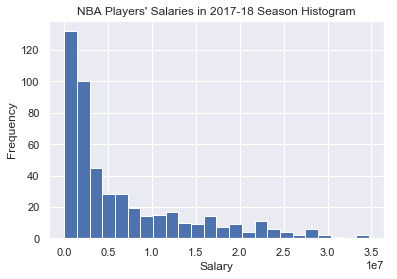

In [43]:
df2.Salary.hist(bins=24)
plt.title("NBA Players' Salaries in 2017-18 Season Histogram")
plt.xlabel("Salary")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Transformed Response')

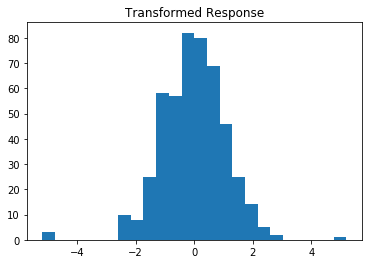

In [6]:
X = np.array(df['Salary']).reshape(-1, 1)
qt = QuantileTransformer(n_quantiles=300, output_distribution='normal')
Y = qt.fit_transform(X)
plt.hist(Y, bins = 24)
plt.title( 'Transformed Response')


(array([ 3.,  0.,  0.,  0.,  0.,  0., 10.,  8., 25., 58., 57., 82., 80.,
        69., 46., 25., 14.,  5.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-5.19933758e+00, -4.76605945e+00, -4.33278132e+00, -3.89950319e+00,
        -3.46622506e+00, -3.03294692e+00, -2.59966879e+00, -2.16639066e+00,
        -1.73311253e+00, -1.29983440e+00, -8.66556264e-01, -4.33278132e-01,
         4.89217555e-11,  4.33278132e-01,  8.66556264e-01,  1.29983440e+00,
         1.73311253e+00,  2.16639066e+00,  2.59966879e+00,  3.03294692e+00,
         3.46622506e+00,  3.89950319e+00,  4.33278132e+00,  4.76605945e+00,
         5.19933758e+00]),
 <a list of 24 Patch objects>)

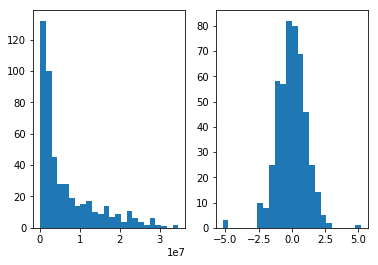

In [7]:
fig, ax = plt.subplots(1,2)
ax[0].hist(X, bins=24)
ax[1].hist(Y, bins=24)

In [8]:
df2['Response'] = Y[0:]
df2.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Response
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,-1.215750
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,0.062917
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,0.852803
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,-0.003175
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,-0.024745


In [9]:
df2.describe()

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Response
count,4.850000e+02,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,...,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,6.636507e+06,29.451546,26.263918,50.167010,1154.142268,13.260825,0.535427,0.337419,0.263270,4.873814,...,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,0.598763,-0.009812
std,7.392602e+06,21.125760,4.272297,24.874872,811.357419,8.769280,0.112121,0.226425,0.293976,4.582810,...,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,1.245653,1.079458
min,4.608000e+04,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,-1.300000,-5.199338
25%,1.471382e+06,11.000000,23.000000,29.000000,381.000000,9.800000,0.506000,0.167000,0.155000,1.800000,...,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,-0.100000,-0.671861
50%,3.202217e+06,25.000000,26.000000,59.000000,1134.000000,13.200000,0.545000,0.346000,0.231000,3.200000,...,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,0.100000,-0.003175
75%,1.000000e+07,47.000000,29.000000,71.000000,1819.000000,16.500000,0.582000,0.480000,0.319000,7.000000,...,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,0.900000,0.682404
max,3.468255e+07,62.000000,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,35.900000,...,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000,5.199338


In [10]:
df2['NBA_Country'] = np.where((df2['NBA_Country'] != "USA"),'Oversea',df2['NBA_Country'])
df2['NBA_Country'].value_counts()

USA        374
Oversea    111
Name: NBA_Country, dtype: int64

In [11]:
df3 = df2.drop(['Salary', 'Player'], axis=1)
df3.head()

,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Response
0,Oversea,43,22,HOU,16,87,0.6,0.303,0.593,0.370,...,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,-1.215750
1,Oversea,42,33,GSW,66,937,16.8,0.608,0.004,0.337,...,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,0.062917
2,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,...,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,0.852803
3,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,...,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,-0.003175
4,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,...,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,-0.024745


In [12]:
df3.corr()['Response'].sort_values()

NBA_DraftNumber   -0.504131
3PAr              -0.064893
TOV%              -0.063831
FTr               -0.016915
ORB%              -0.014937
BLK%               0.049058
STL%               0.055355
TRB%               0.149112
WS/48              0.158496
TS%                0.211996
DRB%               0.222120
USG%               0.243947
DBPM               0.245823
PER                0.250967
AST%               0.252484
OBPM               0.271554
Age                0.341460
BPM                0.344700
G                  0.452567
VORP               0.489313
OWS                0.504056
DWS                0.520295
WS                 0.556820
MP                 0.567254
Response           1.000000
Name: Response, dtype: float64

In [13]:
# Select only categorical variables
category_df = df3.select_dtypes('object')
dummy_df = pd.get_dummies(category_df)
dummy_df['Response'] = df3['Response']
dummy_df.corr()['Response'].sort_values()

Tm_DAL                -0.124941
Tm_MEM                -0.109230
Tm_ATL                -0.069551
NBA_Country_USA       -0.053195
Tm_LAL                -0.049279
Tm_IND                -0.046950
Tm_PHI                -0.040915
Tm_TOT                -0.038686
Tm_UTA                -0.037808
Tm_PHO                -0.033490
Tm_CHI                -0.024328
Tm_DET                -0.011114
Tm_MIL                -0.006665
Tm_LAC                -0.003437
Tm_MIA                 0.005692
Tm_BRK                 0.007483
Tm_BOS                 0.007838
Tm_SAS                 0.015576
Tm_SAC                 0.016226
Tm_ORL                 0.016271
Tm_NOP                 0.031518
Tm_NYK                 0.031977
Tm_TOR                 0.032248
Tm_DEN                 0.042478
Tm_CHO                 0.044340
Tm_HOU                 0.048665
Tm_POR                 0.050693
NBA_Country_Oversea    0.053195
Tm_MIN                 0.057853
Tm_GSW                 0.058243
Tm_OKC                 0.061615
Tm_WAS  

# From the above correlation coefficients, we determine the top 10 most correlated variables 

In [14]:
import sys
!{sys.executable} -m pip install pymc3

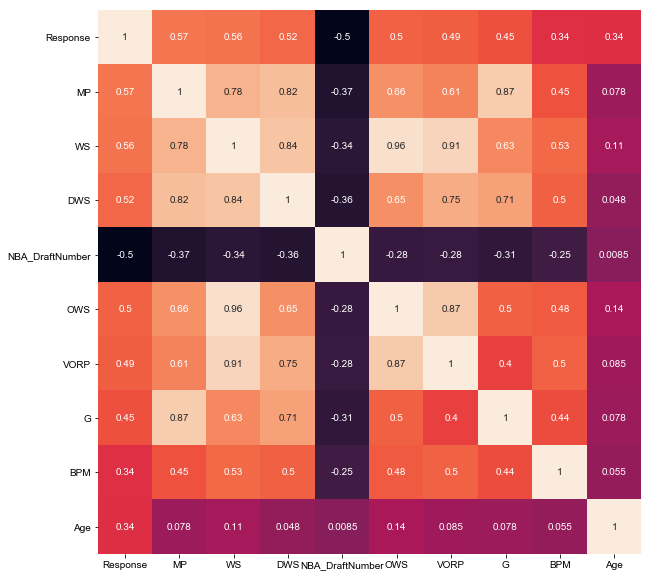

In [14]:
variables = ['Response', 'MP', 'WS', 'DWS', 'NBA_DraftNumber', 'OWS', 'VORP', 'G','BPM', 'Age']
k=10
corrmat = df3.corr(method='pearson', min_periods=1)
r_square = corrmat ** 2

cols = r_square.nlargest(k, 'Response')['Response'].index
cm = df3[cols].corr()
cm_square = cm ** 2
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2g', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Check Multicollinearity

In [15]:
x = df3[['WS', 'VORP', 'OWS', 'MP', 'DWS', 'NBA_DraftNumber', 'Age', 'BPM','G']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,4790.7,WS
1,10.0,VORP
2,1872.6,OWS
3,22.5,MP
4,893.8,DWS
5,3.3,NBA_DraftNumber
6,9.4,Age
7,1.6,BPM
8,26.7,G


# From the above VIF scores, we determine to drop WS, OWS, G and DWS and then we check the VIF scores again. 

In [16]:
x = df3[['VORP', 'MP','NBA_DraftNumber', 'Age', 'BPM']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,2.2,VORP
1,5.0,MP
2,3.2,NBA_DraftNumber
3,7.2,Age
4,1.5,BPM


## Thus, the final five variables that we are going to perform linear regression on are MP(Minutes Played), VORP(Value Over Replacement Player), Draft Number of the player, Age and BPM(Box Plus/Minus: points above league average per 100 possessions played).

In [17]:
def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    mae = np.mean(abs(predictions - y_test))
    rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
    return (mae, rmse)

In [18]:
final_df = df3[['Response','VORP', 'MP','NBA_DraftNumber', 'Age', 'BPM']]
from sklearn.model_selection import train_test_split
X = final_df[['VORP', 'MP','NBA_DraftNumber', 'Age', 'BPM']]
y = final_df[['Response']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

frequentist = LinearRegression()
frequentist.fit(X_train, y_train)

print(evaluate_model(frequentist, X_test, y_test))
print(frequentist.coef_.round(4))
print(frequentist.intercept_.round(4))

(Response    0.611399
dtype: float64, Response    0.930005
dtype: float64)
[[ 0.1703  0.0004 -0.0152  0.0786  0.0075]]
[-2.1587]


In [42]:
sal = frequentist.predict(np.array(Example[:-1]).reshape(1,-1))
freq_salary= np.rint(qt.inverse_transform(sal.reshape(1, -1)))
freq_salary

array([[11964463.]])

In [21]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\Python3.7\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [22]:
bayesian_data = X_train.copy()
bayesian_data['Response'] = y_train
bayesian_data

,VORP,MP,NBA_DraftNumber,Age,BPM,Response
171,0.4,1544,5,22,-0.9,0.137206
221,3.5,2663,9,27,3.3,0.815623
454,-0.5,968,7,24,-3.9,0.276727
433,0.5,1251,34,30,-0.5,0.556477
407,0.5,1124,2,21,-0.2,0.314479
219,1.1,1789,62,28,0.4,1.168719
59,0.0,576,8,26,-1.7,0.719924
375,0.0,9,2,26,-18.2,-1.474025
379,2.4,2044,3,26,2.5,0.815623
154,0.1,1778,2,24,-1.8,0.913073


In [23]:
formula = 'Response~' + ' + '.join(['%s' % variable for variable in X_train.columns[0:]])
formula

'Response~VORP + MP + NBA_DraftNumber + Age + BPM'

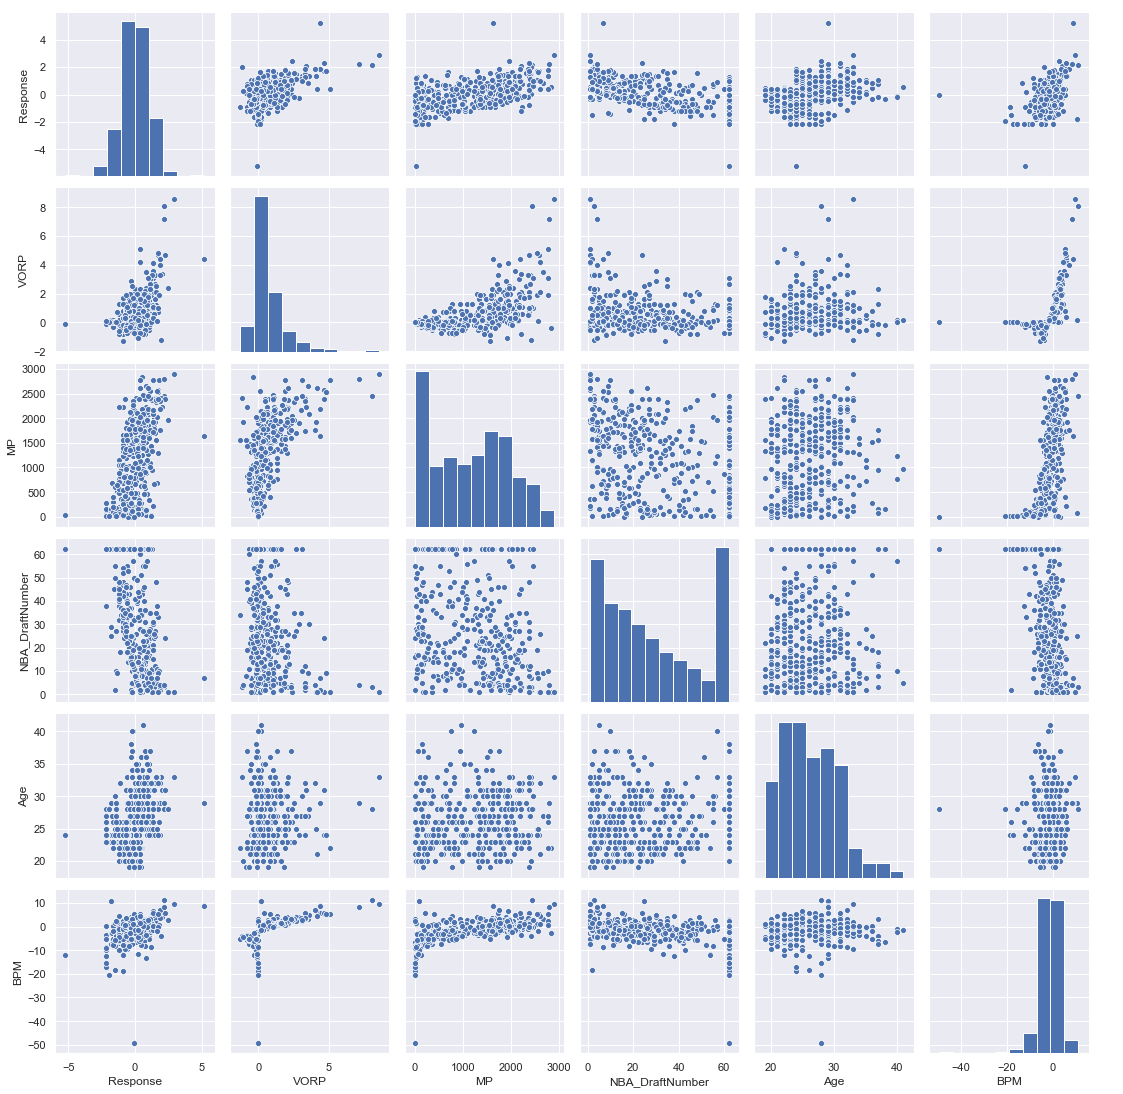

In [24]:
variables = ['Response','VORP','MP', 'NBA_DraftNumber', 'Age', 'BPM']

sns.set()
sns.pairplot(bayesian_data[variables], height = 2.5)
plt.show()

In [27]:
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    pm.GLM.from_formula(formula, data = bayesian_data, family = family)
    
    step = pm.Metropolis()
    
    metro_trace = pm.sample(draws=2000, step=step, chains = 2, tune = 2000, progressbar=True)


Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [BPM]
>Metropolis: [Age]
>Metropolis: [NBA_DraftNumber]
>Metropolis: [MP]
>Metropolis: [VORP]
>Metropolis: [Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 6000/6000 [06:30<00:00, 15.37draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBEC3B76C8>,
      dtype=object)

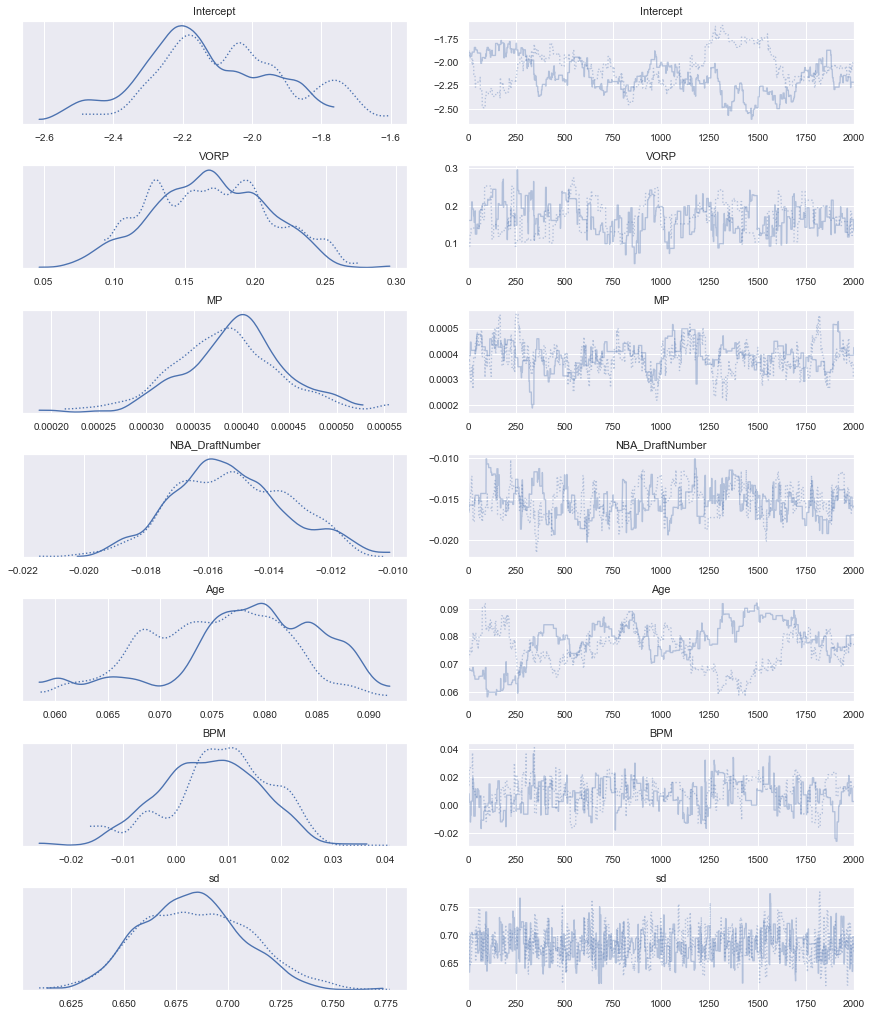

In [28]:
pm.traceplot(metro_trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBEC8C0AC8>,
      dtype=object)

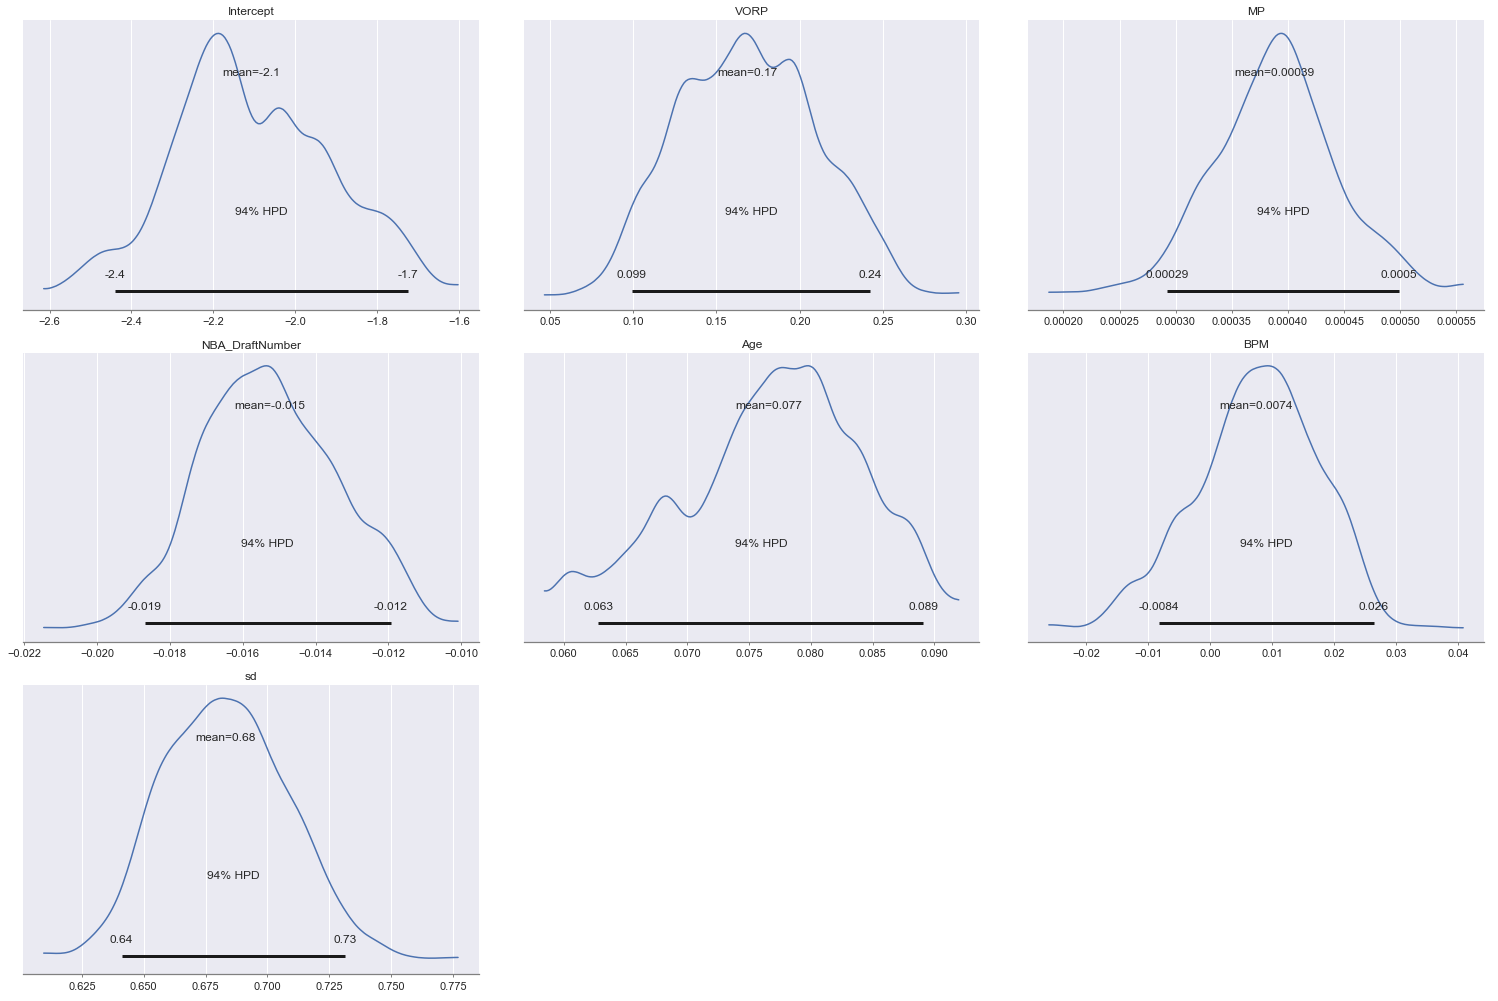

In [38]:
pm.plot_posterior(metro_trace)

In [29]:
pm.summary(metro_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-2.107,0.192,-2.440,-1.726,0.049,0.035,15.0,15.0,15.0,26.0,1.16
VORP,0.169,0.041,0.099,0.242,0.005,0.003,71.0,71.0,70.0,190.0,1.04
MP,0.000,0.000,0.000,0.000,0.000,0.000,75.0,75.0,75.0,117.0,1.01
NBA_DraftNumber,-0.015,0.002,-0.019,-0.012,0.000,0.000,100.0,100.0,100.0,172.0,1.01
Age,0.077,0.007,0.063,0.089,0.002,0.001,14.0,14.0,15.0,43.0,1.14
BPM,0.007,0.010,-0.008,0.026,0.001,0.001,118.0,118.0,118.0,167.0,1.01
sd,0.683,0.025,0.641,0.731,0.001,0.001,422.0,422.0,425.0,527.0,1.01


In [31]:
metro_trace.stat_names

{'accept', 'tune'}

In [33]:
accept = metro_trace.get_sampler_stats('accept', burn=1000)
accept.mean()

0.39278442472120634

In [34]:
for variable in metro_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: -2.1066
Variable: VORP            Mean weight in model: 0.1685
Variable: MP              Mean weight in model: 0.0004
Variable: NBA_DraftNumber Mean weight in model: -0.0153
Variable: Age             Mean weight in model: 0.0766
Variable: BPM             Mean weight in model: 0.0074
Variable: sd_log__        Mean weight in model: -0.3820
Variable: sd              Mean weight in model: 0.6830


In [35]:
model_formula = 'Salary = -2.1066 + '
for variable in metro_trace.varnames[1:-2]:
    model_formula += ' %0.4f * %s +' % (np.mean(metro_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Salary = -2.1066 +  0.1685 * VORP + 0.0004 * MP + -0.0153 * NBA_DraftNumber + 0.0766 * Age + 0.0074 * BPM'

In [36]:
var_dict = {}
for variable in metro_trace.varnames:
    var_dict[variable] = metro_trace[variable]
var_dict
var_weights = pd.DataFrame(var_dict)
    
# Means for all the weights
var_means = var_weights.mean(axis=0)
var_means

Intercept         -2.106558
VORP               0.168504
MP                 0.000388
NBA_DraftNumber   -0.015269
Age                0.076617
BPM                0.007422
sd_log__          -0.382019
sd                 0.682951
dtype: float64

In [37]:
 # Create an intercept column
Bayesian_test = X_test.copy()
Bayesian_test['Intercept'] = 1
Bayesian_test
# # Align names of the test observations and means
names = Bayesian_test.columns[0:]
Bayesian_test = Bayesian_test.loc[:, names]
Bayesian_test

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = Bayesian_test.index, columns = ['estimate'])
results
var_means = var_means[names]
for row in Bayesian_test.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = np.array(results['estimate']) - actual
bayesian_mae = np.mean(abs(errors))
bayesian_rmse = np.sqrt(np.mean(errors ** 2))
display(bayesian_mae)
display(bayesian_rmse)

1.1333709139510566

1.493248352323901

In [40]:
var_means3 = [0.168504,0.000388,-0.015269,0.076617,0.007422,-2.106558]
Example = [0.9,1819,11,29,0.9,1]
res  = np.dot(np.array(var_means3), np.array(Example))
metro_salary= np.rint(qt.inverse_transform(res.reshape(1, -1)))
metro_salary

array([[11939148.]])

In [40]:
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()

    pm.GLM.from_formula(formula, data = bayesian_data, family = family)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    
    nuts2_trace = pm.sample(draws=2000, step=step, start=start,chains = 2, tune = 1000, progressbar=True)

logp = -440.14, ||grad|| = 35.328: 100%|█████████████████████████████████████████████| 112/112 [00:02<00:00, 53.34it/s]
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, BPM, Age, NBA_DraftNumber, MP, VORP, Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 6000/6000 [37:09<00:00,  2.69draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209B75938C8>,
      dtype=object)

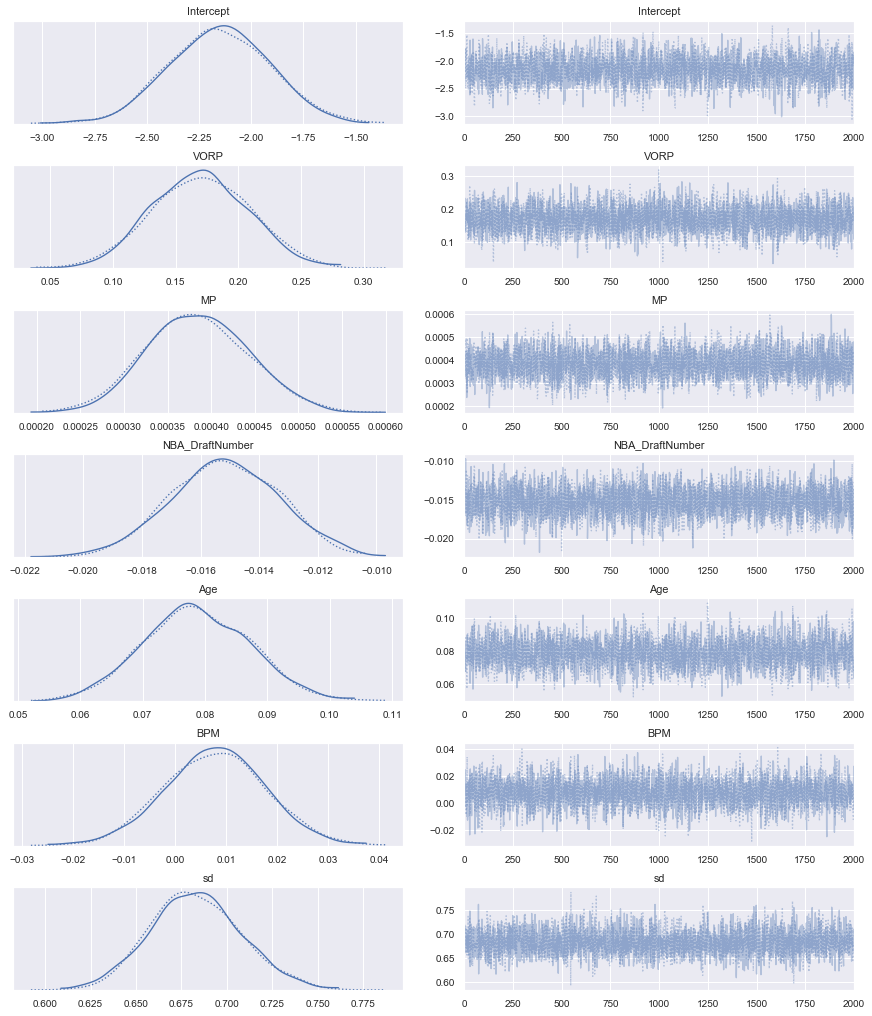

In [41]:
pm.traceplot(nuts2_trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209B7921788>,
      dtype=object)

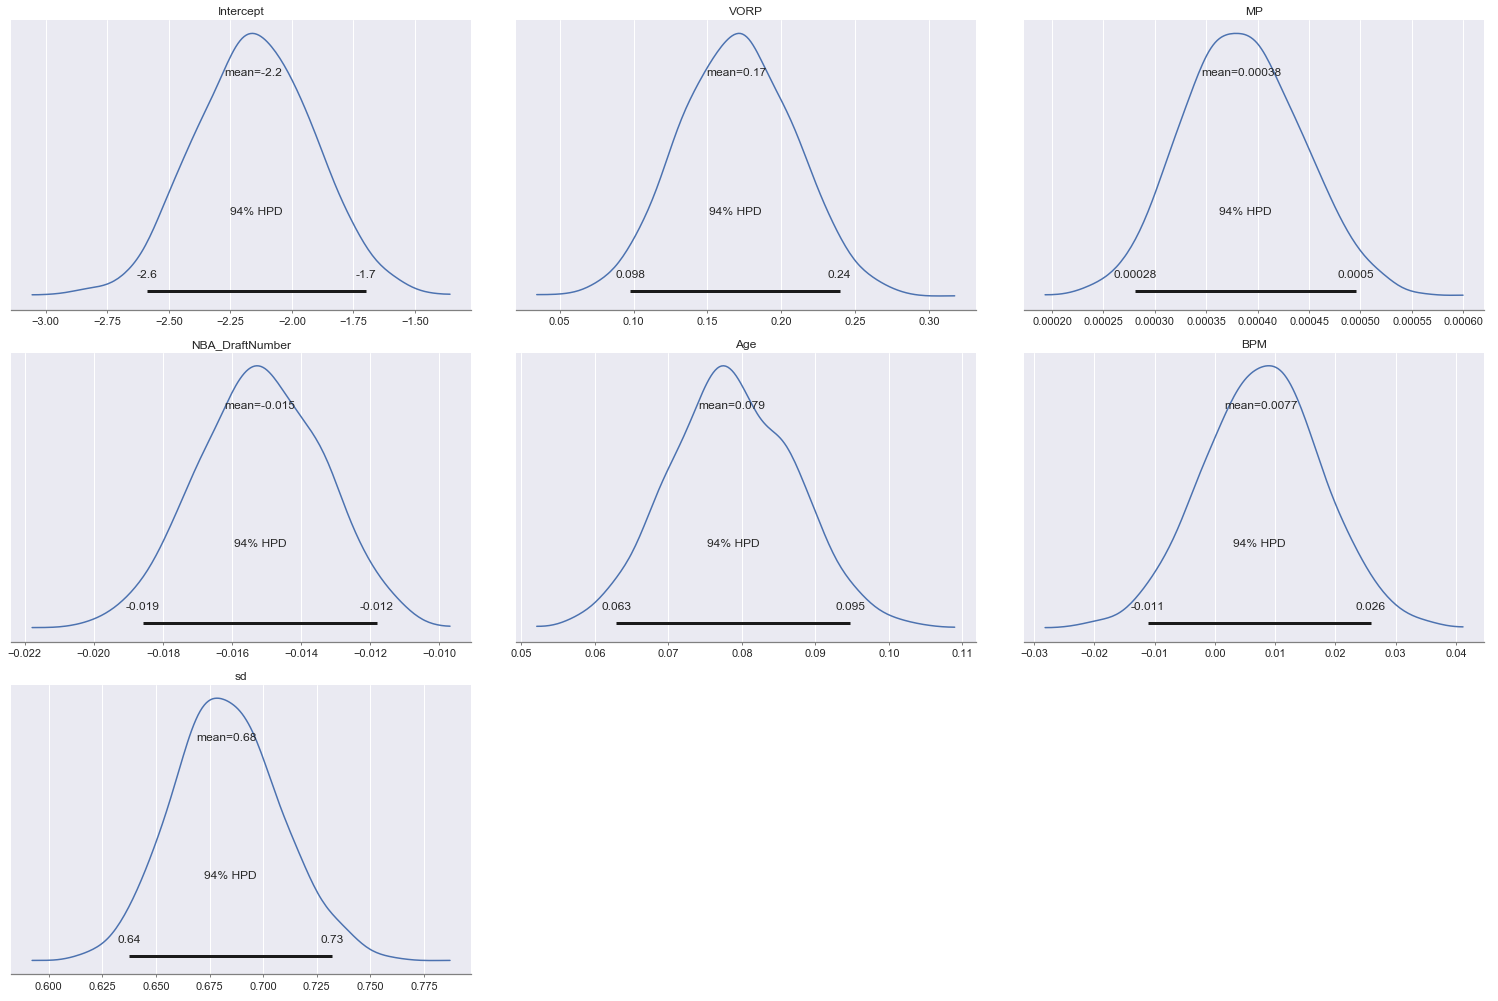

In [42]:
pm.plot_posterior(nuts2_trace)

In [43]:
pm.summary(nuts2_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-2.156,0.241,-2.587,-1.699,0.005,0.004,2298.0,2276.0,2307.0,1982.0,1.0
VORP,0.169,0.038,0.098,0.239,0.001,0.000,3419.0,3419.0,3414.0,2814.0,1.0
MP,0.000,0.000,0.000,0.000,0.000,0.000,3376.0,3376.0,3362.0,2901.0,1.0
NBA_DraftNumber,-0.015,0.002,-0.019,-0.012,0.000,0.000,3053.0,3053.0,3044.0,2517.0,1.0
Age,0.079,0.009,0.063,0.095,0.000,0.000,2431.0,2392.0,2438.0,2052.0,1.0
BPM,0.008,0.010,-0.011,0.026,0.000,0.000,3372.0,2458.0,3368.0,2667.0,1.0
sd,0.683,0.025,0.638,0.732,0.000,0.000,3668.0,3655.0,3690.0,2646.0,1.0


In [44]:
for variable in nuts2_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, np.mean(nuts2_trace[variable])))

Variable: Intercept       Mean weight in model: -2.1563
Variable: VORP            Mean weight in model: 0.1694
Variable: MP              Mean weight in model: 0.0004
Variable: NBA_DraftNumber Mean weight in model: -0.0152
Variable: Age             Mean weight in model: 0.0786
Variable: BPM             Mean weight in model: 0.0077
Variable: sd_log__        Mean weight in model: -0.3823
Variable: sd              Mean weight in model: 0.6828


In [45]:
model_formula = 'Salary = -2.1598 + '
for variable in nuts2_trace.varnames[1:-2]:
    model_formula += ' %0.4f * %s +' % (np.mean(nuts2_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Salary = -2.1598 +  0.1694 * VORP + 0.0004 * MP + -0.0152 * NBA_DraftNumber + 0.0786 * Age + 0.0077 * BPM'

In [46]:
var_dict = {}
for variable in nuts2_trace.varnames:
    var_dict[variable] = nuts2_trace[variable]
var_dict
var_weights = pd.DataFrame(var_dict)
    
# Means for all the weights
var_means = var_weights.mean(axis=0)
var_means

Intercept         -2.156293
VORP               0.169396
MP                 0.000384
NBA_DraftNumber   -0.015201
Age                0.078597
BPM                0.007690
sd_log__          -0.382290
sd                 0.682753
dtype: float64

In [47]:
 # Create an intercept column
Bayesian_test = X_test.copy()
Bayesian_test['Intercept'] = 1
Bayesian_test
# # Align names of the test observations and means
names = Bayesian_test.columns[0:]
Bayesian_test = Bayesian_test.loc[:, names]
Bayesian_test

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = Bayesian_test.index, columns = ['estimate'])
results
var_means = var_means[names]
for row in Bayesian_test.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = np.array(results['estimate']) - actual
bayesian_mae = np.mean(abs(errors))
bayesian_rmse = np.sqrt(np.mean(errors ** 2))
display(bayesian_mae)
display(bayesian_rmse)

1.1341901453844034

1.4940587421104463

In [ ]:
var_means

In [42]:
with pm.Model() as normal_model:
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data = bayesian_data, family = family)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    nuts_trace = pm.sample(draws=1000, step=step, start=start,chains = 2, tune = 1000, progressbar=True)

logp = -440.14, ||grad|| = 35.328: 100%|█████████████████████████████████████████████| 112/112 [00:02<00:00, 49.48it/s]
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, BPM, Age, NBA_DraftNumber, MP, VORP, Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 4000/4000 [27:25<00:00,  2.43draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456966E888>,
      dtype=object)

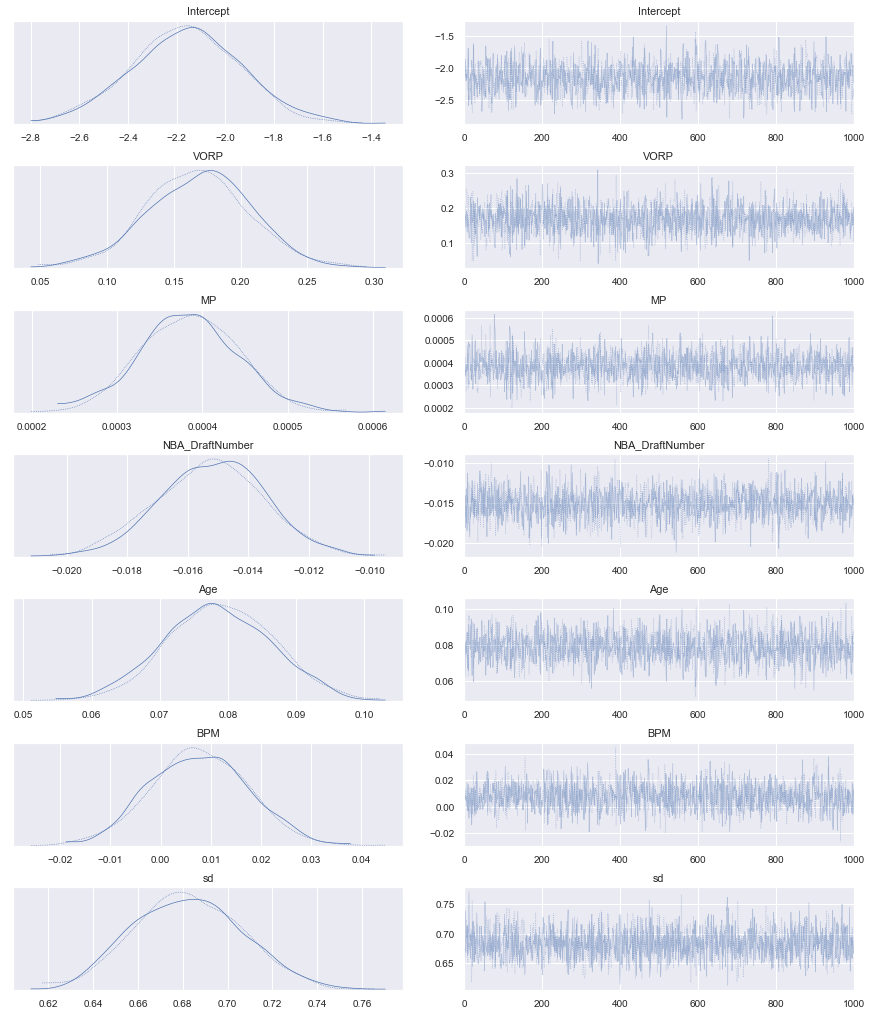

In [43]:
pm.traceplot(nuts_trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024564EAEBC8>,
      dtype=object)

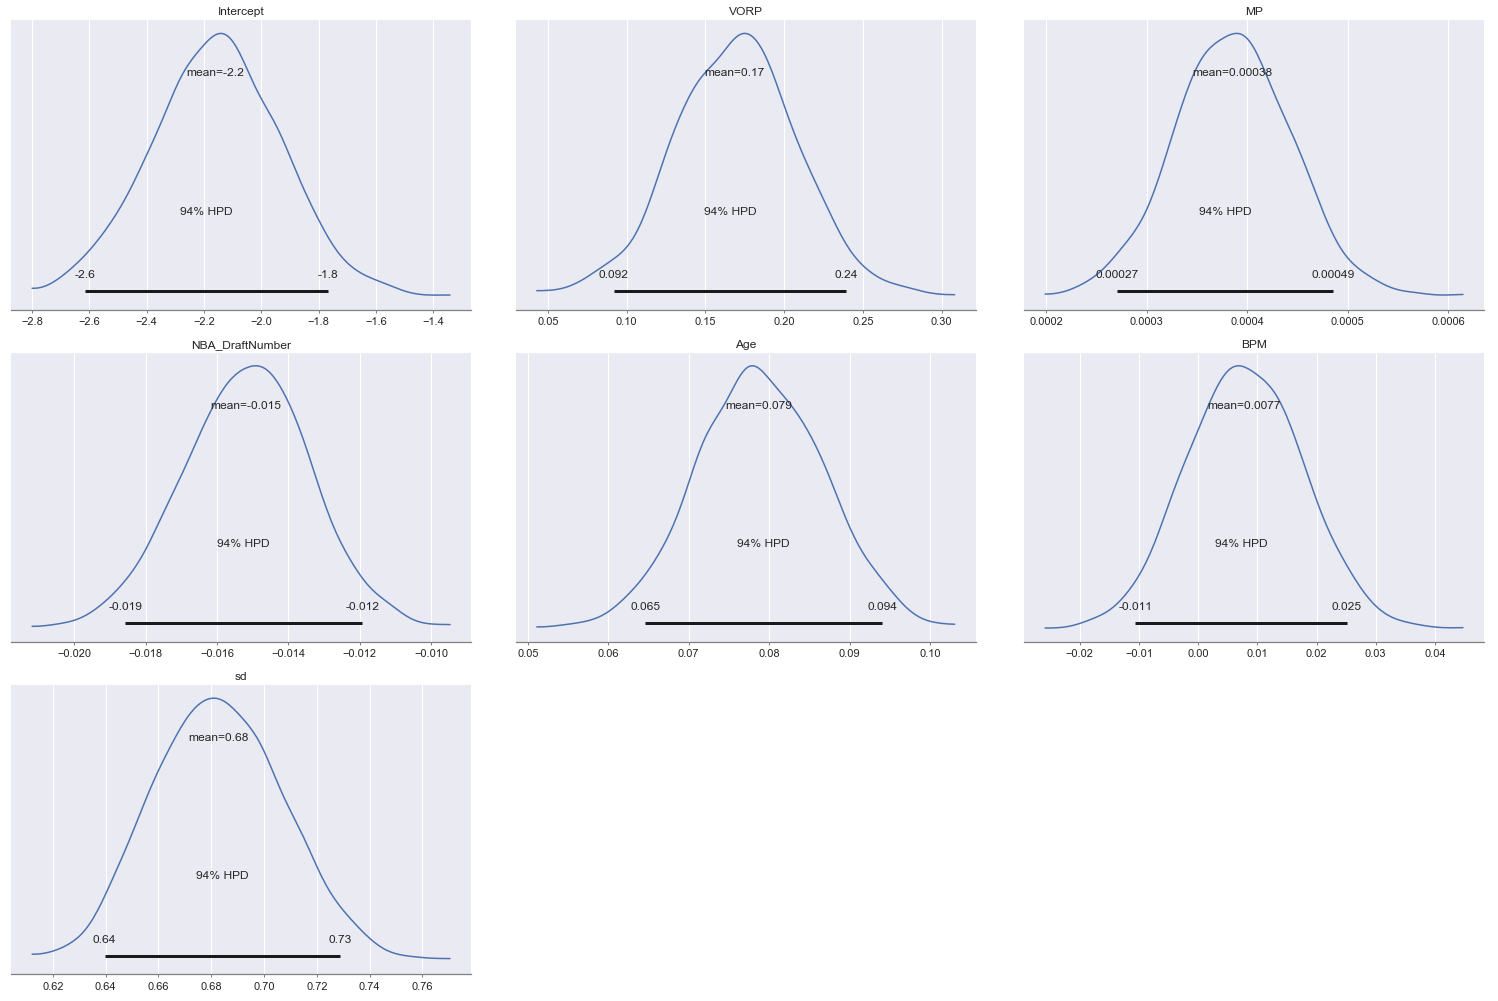

In [47]:
pm.plot_posterior(nuts_trace)

In [49]:
pm.summary(nuts_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-2.160,0.224,-2.615,-1.769,0.006,0.004,1531.0,1531.0,1531.0,1317.0,1.00
VORP,0.169,0.039,0.092,0.239,0.001,0.001,1841.0,1821.0,1839.0,1267.0,1.00
MP,0.000,0.000,0.000,0.000,0.000,0.000,1520.0,1490.0,1524.0,1444.0,1.00
NBA_DraftNumber,-0.015,0.002,-0.019,-0.012,0.000,0.000,1761.0,1727.0,1759.0,1470.0,1.01
Age,0.079,0.008,0.065,0.094,0.000,0.000,1653.0,1653.0,1653.0,1416.0,1.00
BPM,0.008,0.010,-0.011,0.025,0.000,0.000,1806.0,1336.0,1805.0,1456.0,1.00
sd,0.683,0.024,0.640,0.729,0.001,0.000,1760.0,1760.0,1763.0,1202.0,1.00


In [50]:
for variable in nuts_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, np.mean(nuts_trace[variable])))

Variable: Intercept       Mean weight in model: -2.1598
Variable: VORP            Mean weight in model: 0.1687
Variable: MP              Mean weight in model: 0.0004
Variable: NBA_DraftNumber Mean weight in model: -0.0152
Variable: Age             Mean weight in model: 0.0787
Variable: BPM             Mean weight in model: 0.0077
Variable: sd_log__        Mean weight in model: -0.3824
Variable: sd              Mean weight in model: 0.6827


In [57]:
model_formula = 'Salary = -2.1598 + '
for variable in nuts_trace.varnames[1:-2]:
    model_formula += ' %0.4f * %s +' % (np.mean(nnuts_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Salary = -2.1598 +  0.1687 * VORP + 0.0004 * MP + -0.0152 * NBA_DraftNumber + 0.0787 * Age + 0.0077 * BPM'

In [74]:
var_dict = {}
for variable in nuts_trace.varnames:
    var_dict[variable] = nuts_trace[variable]
var_dict
var_weights = pd.DataFrame(var_dict)
    
# Means for all the weights
var_means = var_weights.mean(axis=0)
var_means

Intercept         -2.159765
VORP               0.168747
MP                 0.000385
NBA_DraftNumber   -0.015203
Age                0.078704
BPM                0.007733
sd_log__          -0.382395
sd                 0.682662
dtype: float64

In [ ]:
Response MAE   0.611399
Response RMSE   0.930005

In [88]:
 # Create an intercept column
Bayesian_test = X_test.copy()
Bayesian_test['Intercept'] = 1
Bayesian_test
# # Align names of the test observations and means
names = Bayesian_test.columns[0:]
Bayesian_test = Bayesian_test.loc[:, names]
Bayesian_test

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = Bayesian_test.index, columns = ['estimate'])
results
var_means = var_means[names]
for row in Bayesian_test.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = np.array(results['estimate']) - actual
bayesian_mae = np.mean(abs(errors))
bayesian_rmse = np.sqrt(np.mean(errors ** 2))
display(bayesian_mae)
display(bayesian_rmse)

1.1344456803051564

1.4943227060156816

In [90]:
var_means

VORP               0.168747
MP                 0.000385
NBA_DraftNumber   -0.015203
Age                0.078704
BPM                0.007733
Intercept         -2.159765
dtype: float64

In [41]:
scores= [ (0.611399, 0.930005) ,
             (1.1344457, 1.494323 ),
         (1.134190,1.494059),
        (1.133371,1.493248)]
 
# Create DataFrame object from a list of tuples
Eval = pd.DataFrame(scores, columns = ['Mean Abs. Error' , 'Root Mean Square Error'], index=['Frequentist', 'NUTS_1000','NUTS_2000','Metro_2000'])
Eval

,Mean Abs. Error,Root Mean Square Error
Frequentist,0.611399,0.930005
NUTS_1000,1.134446,1.494323
NUTS_2000,1.134190,1.494059
Metro_2000,1.133371,1.493248


# Test on the mean of the data 

In [50]:
var_means = [0.168747,0.000385,-0.015203,0.078704,0.007733,-2.159765]
Example = [0.9,1819,11,29,0.9,1]
res  = np.dot(np.array(var_means), np.array(Example))
example_salary= np.rint(qt.inverse_transform(res.reshape(1, -1)))
example_salary

array([[11984473.]])

In [59]:
var_means2 = [0.169396, 0.000384,-0.015201,0.078597,0.007690,-2.156293]
res2  = np.dot(np.array(var_means), np.array(Example))
bay2_salary= np.rint(qt.inverse_transform(res2.reshape(1, -1)))
bay2_salary

array([[11984473.]])